In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

import sklearn.metrics as metrics

#### The following cell read the values from the csv file and read it into a dataframe

In [0]:
df = pd.read_csv('sp500.csv')
dataset = df.values

### Correlation matrix
#### Calculating the correlation matrix, and extracting the values of the correlation with SP500 index

In [0]:
corrmat = df.corr()
values = corrmat['SP500'].values

#### Calculating the stock that is most correlated with the S&P Index from the Correlation Matrix

In [0]:
max = 0
maxi = 0
for i in range(2, 388):
    if(abs(np.float(values[i])) > max ):
        max = abs(np.float(values[i]))
        maxi = i

name = df.columns[maxi]
print(name, values[maxi])

APH 0.9883608178608217


### Changing DataFrame

#### Using the column of the stock that is most correlated with the S&P Index which is the "APH" with correlation value equals to 0.988.

In [0]:
df = df[[name]]

#### Duplicating and renaming the same column 9 times to correspond to the 9 days we are concerned with.

In [0]:
# df1
arr = []
for i in range(9):
    arr.append(df)
newdf = pd.concat(arr, axis = 1)
newdf.columns = ["t-4", "t-3", "t-2", "t-1", "t", "t+1", "t+2", "t+3", "t+4"]

#### shifting each column by a certain value depending on the day that it represents.

In [0]:
for i in range(9):
    newdf[newdf.columns[8-i]] = newdf[newdf.columns[8-i]].shift(i)

#### Dropping rows that have nan values

In [0]:
newdf = newdf.dropna()
dataset = newdf.values

### Training
#### Extracting the input data and the targets

In [0]:
# Extracting training input values
X = dataset[:,:5]
# Extracting training classes values
y = dataset[:,5:]

#### Spliting data into training and testing sets

Spliting the data into 80% training and 20% testing

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Creating the the training model
SGD model

In [0]:
model_sgd = MLPRegressor(
    hidden_layer_sizes=(32,32,32),max_iter=2000,
    random_state=1,
    solver='sgd',
    learning_rate_init= 0.0000001,
    early_stopping= True,
    validation_fraction= 0.2)

Adam Model

In [0]:
model_adam = MLPRegressor(
    hidden_layer_sizes=(32,32,32),max_iter=2000,
    random_state=1,
    solver='adam',
    learning_rate_init= 0.01,
    early_stopping= True,
    validation_fraction= 0.2)

#### Training the models

In [0]:
model_sgd.fit(X_train,y_train)
model_adam.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(32, 32, 32), learning_rate='constant',
       learning_rate_init=0.01, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.2, verbose=False,
       warm_start=False)

#### Testing the models

In [0]:
predictions_sgd = model_sgd.predict(X_test)
predictions_adam = model_adam.predict(X_test)

Evaluating models using Mean Squared Error

In [0]:
mse_sgd = metrics.mean_squared_error(y_test, predictions_sgd)
mse_adam = metrics.mean_squared_error(y_test, predictions_adam)

print("SGD mse =" ,mse_sgd)
print("Adam mse =" ,mse_adam)

SGD mse = 1.1914853610940406
Adam mse = 1.1036122640239396


### Visualizing the output
#### The output of the model that used adam optmizer

Using 6 samples from the test set and plotting there predicted outputs (Orange) vs actual outputs (Blue) for each day. 


Day 1


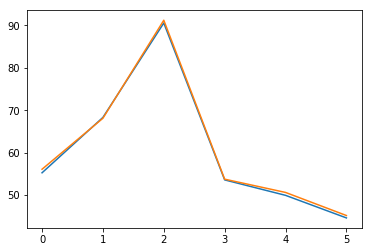

Day 2


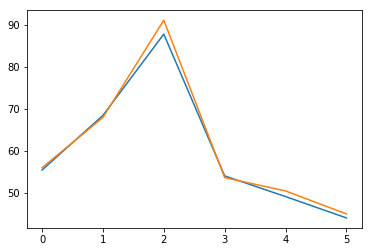

Day 3


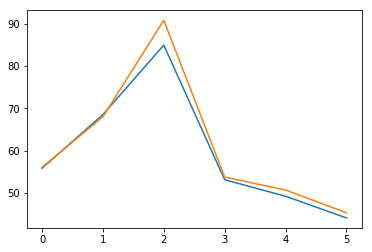

Day 4


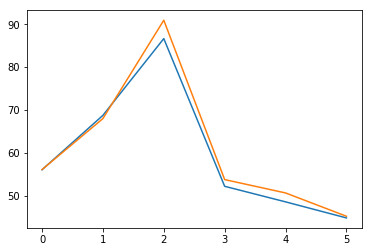

In [0]:
x = []
samples = 6
for i in range(samples):
    x.append(i)

#print(y_test[:3])
#print(predictions_adam[:3])
print()
print("Day 1")
plt.plot(x, y_test[:samples,0])
plt.plot(x, predictions_adam[:samples,0])
plt.show()
print("Day 2")
plt.plot(x, y_test[:samples,1])
plt.plot(x, predictions_adam[:samples,1])
plt.show()
print("Day 3")
plt.plot(x, y_test[:samples,2])
plt.plot(x, predictions_adam[:samples,2])
plt.show()
print("Day 4")
plt.plot(x, y_test[:samples,3])
plt.plot(x, predictions_adam[:samples,3])
plt.show()

### Summary

After several tuning and modifications we found out that the Adam optmizer is better than SGD optimizer in Task 2 with the following configurations: 

Learning Rate = 10^(-2) and Hidden Layer Sizes = 32x32x32. These configurations achieves lowest MSE which is (1.10) 

#### Justification of the similarities and differences in values.

The best prediction is on the first day where the difference between predicted and actual values is not large, the prediction becomes worse each day and tha gap between predicted and actual values increases. This seems logical because each day is related to the days directly before it and those exists in the features columns, however, each day that follows the 1st day doesn't have the day directly before it in the features because it is part of the target columns.